In [1]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import json
from math import sin, cos
from glob import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from torchvision.transforms.autoaugment import AutoAugmentPolicy
import pickle
from skimage.transform import rotate
from skimage.io import imread, imsave, imshow
from skimage.transform import rescale, resize, downscale_local_mean

import cv2
from PIL import Image

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
def rot_mat(alpha):
    res = np.zeros((2, 2))
    res[0,0] = np.cos(alpha/180*np.pi)
    res[0,1] = -np.sin(alpha/180*np.pi)
    res[1,0] = np.sin(alpha/180*np.pi)
    res[1,1] = np.cos(alpha/180*np.pi)
    return res

In [26]:
scale = 4
train_paths = sorted(glob(f'data\\train\\img_{scale}\\bicubic\\*.png'))

In [27]:
new_orig = np.zeros((10496//scale, 10496//scale, 3), dtype='uint8')

 65%|███████████████████████████████████████████████████▏                           | 518/800 [00:04<00:02, 126.01it/s]

data\train\img_4\bicubic\0801.png
1609 1649
data\train\img_4\bicubic\0808.png
1506 781
data\train\img_4\bicubic\0811.png
829 1357
data\train\img_4\bicubic\0812.png
945 1348
data\train\img_4\bicubic\0816.png
591 2332
data\train\img_4\bicubic\0820.png
2117 994


 67%|█████████████████████████████████████████████████████▍                          | 534/800 [00:11<00:31,  8.44it/s]

data\train\img_4\bicubic\0821.png
739 1209
data\train\img_4\bicubic\0822.png
1419 1289
data\train\img_4\bicubic\0823.png
1864 1908
data\train\img_4\bicubic\0824.png
1355 1617
data\train\img_4\bicubic\0825.png
2465 1506
data\train\img_4\bicubic\0826.png
1805 1965
data\train\img_4\bicubic\0827.png
2477 488
data\train\img_4\bicubic\0828.png
1119 2283
data\train\img_4\bicubic\0829.png
2223 2444


 67%|█████████████████████████████████████████████████████▍                          | 534/800 [00:21<00:31,  8.44it/s]

data\train\img_4\bicubic\0830.png
1860 1614


 68%|██████████████████████████████████████████████████████▍                         | 544/800 [00:22<01:20,  3.20it/s]

data\train\img_4\bicubic\0831.png
1128 1823


 68%|██████████████████████████████████████████████████████▌                         | 545/800 [00:24<01:25,  2.97it/s]

data\train\img_4\bicubic\0833.png
1295 1069
data\train\img_4\bicubic\0834.png
1628 679
data\train\img_4\bicubic\0835.png
1338 1560
data\train\img_4\bicubic\0838.png
885 1217
data\train\img_4\bicubic\0839.png
1281 1707
data\train\img_4\bicubic\0840.png
725 2022
data\train\img_4\bicubic\0841.png
1513 1489
data\train\img_4\bicubic\0842.png
764 941


 69%|███████████████████████████████████████████████████████▎                        | 553/800 [00:33<02:11,  1.87it/s]

data\train\img_4\bicubic\0843.png
1996 513
data\train\img_4\bicubic\0844.png
1644 570
data\train\img_4\bicubic\0847.png
815 1933
data\train\img_4\bicubic\0848.png
439 1973
data\train\img_4\bicubic\0849.png
1176 1028
data\train\img_4\bicubic\0852.png
738 454


 70%|███████████████████████████████████████████████████████▉                        | 559/800 [00:41<02:43,  1.48it/s]

data\train\img_4\bicubic\0853.png
2489 2444
data\train\img_4\bicubic\0854.png
1084 1278
data\train\img_4\bicubic\0856.png
1311 2101
data\train\img_4\bicubic\0857.png
2214 651


 70%|████████████████████████████████████████████████████████▎                       | 563/800 [00:46<03:00,  1.31it/s]

data\train\img_4\bicubic\0859.png
2146 959
data\train\img_4\bicubic\0860.png
2351 717
data\train\img_4\bicubic\0863.png
1640 1745


 71%|████████████████████████████████████████████████████████▌                       | 566/800 [00:49<03:07,  1.25it/s]

data\train\img_4\bicubic\0865.png
1149 1693
data\train\img_4\bicubic\0866.png
1319 1319


 71%|████████████████████████████████████████████████████████▊                       | 568/800 [00:51<03:13,  1.20it/s]

data\train\img_4\bicubic\0867.png
1575 1909
data\train\img_4\bicubic\0873.png
772 2088


 71%|█████████████████████████████████████████████████████████                       | 570/800 [00:53<03:18,  1.16it/s]

data\train\img_4\bicubic\0874.png
599 1017


 71%|█████████████████████████████████████████████████████████                       | 571/800 [00:54<03:24,  1.12it/s]

data\train\img_4\bicubic\0875.png
1441 1584


 72%|█████████████████████████████████████████████████████████▏                      | 572/800 [00:56<03:41,  1.03it/s]

data\train\img_4\bicubic\0876.png
2391 2091


 72%|█████████████████████████████████████████████████████████▎                      | 573/800 [00:57<03:40,  1.03it/s]

data\train\img_4\bicubic\0878.png
2309 2291


 72%|█████████████████████████████████████████████████████████▍                      | 574/800 [00:58<04:07,  1.09s/it]

data\train\img_4\bicubic\0879.png
1166 463


 72%|█████████████████████████████████████████████████████████▌                      | 575/800 [00:59<04:06,  1.10s/it]

data\train\img_4\bicubic\0883.png
436 1050


 72%|█████████████████████████████████████████████████████████▌                      | 576/800 [01:01<04:07,  1.11s/it]

data\train\img_4\bicubic\0884.png
2418 929


 72%|█████████████████████████████████████████████████████████▋                      | 577/800 [01:02<04:08,  1.11s/it]

data\train\img_4\bicubic\0887.png
1149 1284


 72%|█████████████████████████████████████████████████████████▊                      | 578/800 [01:03<04:05,  1.11s/it]

data\train\img_4\bicubic\0889.png
1244 1331


 72%|█████████████████████████████████████████████████████████▉                      | 579/800 [01:04<03:49,  1.04s/it]

data\train\img_4\bicubic\0890.png
1937 900


 72%|██████████████████████████████████████████████████████████                      | 580/800 [01:05<03:54,  1.07s/it]

data\train\img_4\bicubic\0892.png
2334 2115


 73%|██████████████████████████████████████████████████████████                      | 581/800 [01:06<04:01,  1.10s/it]

data\train\img_4\bicubic\0893.png
1083 793


 73%|██████████████████████████████████████████████████████████▏                     | 582/800 [01:07<03:50,  1.06s/it]

data\train\img_4\bicubic\0894.png
1443 1244


 73%|██████████████████████████████████████████████████████████▎                     | 583/800 [01:08<03:48,  1.05s/it]

data\train\img_4\bicubic\0895.png
1895 1891


 73%|██████████████████████████████████████████████████████████▍                     | 584/800 [01:09<03:44,  1.04s/it]

data\train\img_4\bicubic\0897.png
552 1689


 73%|██████████████████████████████████████████████████████████▌                     | 585/800 [01:10<03:35,  1.00s/it]

data\train\img_4\bicubic\0898.png
2087 1528


 73%|██████████████████████████████████████████████████████████▌                     | 586/800 [01:11<03:46,  1.06s/it]

data\train\img_4\bicubic\0899.png
1669 1842


 73%|██████████████████████████████████████████████████████████▋                     | 587/800 [01:12<03:48,  1.07s/it]

data\train\img_4\bicubic\0900.png
1884 1427


 74%|██████████████████████████████████████████████████████████▊                     | 588/800 [01:13<03:38,  1.03s/it]

data\train\img_4\bicubic\0903.png
524 1626


 74%|██████████████████████████████████████████████████████████▉                     | 589/800 [01:14<03:45,  1.07s/it]

data\train\img_4\bicubic\0905.png
703 1110


 74%|███████████████████████████████████████████████████████████                     | 590/800 [01:15<03:47,  1.08s/it]

data\train\img_4\bicubic\0907.png
777 1468


 74%|███████████████████████████████████████████████████████████                     | 591/800 [01:17<03:58,  1.14s/it]

data\train\img_4\bicubic\0908.png
2142 2435


 74%|███████████████████████████████████████████████████████████▏                    | 592/800 [01:17<03:38,  1.05s/it]

data\train\img_4\bicubic\0909.png
2419 1189


 74%|███████████████████████████████████████████████████████████▎                    | 593/800 [01:19<03:50,  1.12s/it]

data\train\img_4\bicubic\0911.png
1127 693


 74%|███████████████████████████████████████████████████████████▍                    | 594/800 [01:20<03:44,  1.09s/it]

data\train\img_4\bicubic\0912.png
869 1743


 74%|███████████████████████████████████████████████████████████▌                    | 595/800 [01:21<03:39,  1.07s/it]

data\train\img_4\bicubic\0913.png
1443 1241


 74%|███████████████████████████████████████████████████████████▌                    | 596/800 [01:22<03:57,  1.16s/it]

data\train\img_4\bicubic\0914.png
1749 2101


 75%|███████████████████████████████████████████████████████████▋                    | 597/800 [01:24<04:17,  1.27s/it]

data\train\img_4\bicubic\0915.png
1714 1531


 75%|███████████████████████████████████████████████████████████▊                    | 598/800 [01:25<04:11,  1.25s/it]

data\train\img_4\bicubic\0916.png
774 1635


 75%|███████████████████████████████████████████████████████████▉                    | 599/800 [01:26<03:55,  1.17s/it]

data\train\img_4\bicubic\0917.png
1026 663


 75%|████████████████████████████████████████████████████████████                    | 600/800 [01:27<04:08,  1.24s/it]

data\train\img_4\bicubic\0925.png
2458 811


 75%|████████████████████████████████████████████████████████████                    | 601/800 [01:29<04:31,  1.36s/it]

data\train\img_4\bicubic\0926.png
1633 927


 75%|████████████████████████████████████████████████████████████▏                   | 602/800 [01:30<03:57,  1.20s/it]

data\train\img_4\bicubic\0928.png
2285 1952


 75%|████████████████████████████████████████████████████████████▎                   | 603/800 [01:31<04:00,  1.22s/it]

data\train\img_4\bicubic\0929.png
856 750


 76%|████████████████████████████████████████████████████████████▍                   | 604/800 [01:32<04:10,  1.28s/it]

data\train\img_4\bicubic\0931.png
1801 1582


 76%|████████████████████████████████████████████████████████████▌                   | 605/800 [01:33<03:52,  1.19s/it]

data\train\img_4\bicubic\0932.png
2055 1116


 76%|████████████████████████████████████████████████████████████▌                   | 606/800 [01:34<03:41,  1.14s/it]

data\train\img_4\bicubic\0933.png
2399 666


 76%|████████████████████████████████████████████████████████████▋                   | 607/800 [01:36<03:55,  1.22s/it]

data\train\img_4\bicubic\0935.png
2157 1575


 76%|████████████████████████████████████████████████████████████▊                   | 608/800 [01:37<03:41,  1.16s/it]

data\train\img_4\bicubic\0936.png
2293 1353


 76%|████████████████████████████████████████████████████████████▉                   | 609/800 [01:38<03:39,  1.15s/it]

data\train\img_4\bicubic\0938.png
1026 935


 76%|█████████████████████████████████████████████████████████████                   | 610/800 [01:39<03:33,  1.12s/it]

data\train\img_4\bicubic\0939.png
2098 1042


 76%|█████████████████████████████████████████████████████████████                   | 611/800 [01:40<03:16,  1.04s/it]

data\train\img_4\bicubic\0941.png
1985 983


 76%|█████████████████████████████████████████████████████████████▏                  | 612/800 [01:41<03:12,  1.03s/it]

data\train\img_4\bicubic\0942.png
481 1544


 77%|█████████████████████████████████████████████████████████████▎                  | 613/800 [01:42<03:39,  1.17s/it]

data\train\img_4\bicubic\0944.png
1983 1667


 77%|█████████████████████████████████████████████████████████████▍                  | 614/800 [01:44<04:00,  1.29s/it]

data\train\img_4\bicubic\0946.png
2185 393


 77%|█████████████████████████████████████████████████████████████▌                  | 615/800 [01:45<03:44,  1.21s/it]

data\train\img_4\bicubic\0950.png
1444 1955


 77%|█████████████████████████████████████████████████████████████▌                  | 616/800 [01:46<03:54,  1.27s/it]

data\train\img_4\bicubic\0952.png
1634 1621


 77%|█████████████████████████████████████████████████████████████▋                  | 617/800 [01:48<03:48,  1.25s/it]

data\train\img_4\bicubic\0954.png
1037 2254


 77%|█████████████████████████████████████████████████████████████▊                  | 618/800 [01:49<03:44,  1.23s/it]

data\train\img_4\bicubic\0956.png
1026 1495


 77%|█████████████████████████████████████████████████████████████▉                  | 619/800 [01:50<03:49,  1.27s/it]

data\train\img_4\bicubic\0957.png
2412 1321


 78%|██████████████████████████████████████████████████████████████                  | 620/800 [01:51<03:26,  1.15s/it]

data\train\img_4\bicubic\0958.png
1122 2336


 78%|██████████████████████████████████████████████████████████████                  | 621/800 [01:52<03:24,  1.14s/it]

data\train\img_4\bicubic\0959.png
1053 2397


 78%|██████████████████████████████████████████████████████████████▏                 | 622/800 [01:53<03:08,  1.06s/it]

data\train\img_4\bicubic\0961.png
563 1793


 78%|██████████████████████████████████████████████████████████████▎                 | 623/800 [01:54<03:03,  1.03s/it]

data\train\img_4\bicubic\0962.png
2214 755


 78%|██████████████████████████████████████████████████████████████▍                 | 624/800 [01:55<03:11,  1.09s/it]

data\train\img_4\bicubic\0964.png
1739 1286


 78%|██████████████████████████████████████████████████████████████▌                 | 625/800 [01:57<03:35,  1.23s/it]

data\train\img_4\bicubic\0966.png
2374 1791


 78%|██████████████████████████████████████████████████████████████▌                 | 626/800 [01:58<03:28,  1.20s/it]

data\train\img_4\bicubic\0967.png
659 1294


 78%|██████████████████████████████████████████████████████████████▋                 | 627/800 [01:59<03:14,  1.13s/it]

data\train\img_4\bicubic\0968.png
1188 1213


 78%|██████████████████████████████████████████████████████████████▊                 | 628/800 [02:01<03:59,  1.40s/it]

data\train\img_4\bicubic\0970.png
511 1772


 79%|██████████████████████████████████████████████████████████████▉                 | 629/800 [02:02<03:55,  1.38s/it]

data\train\img_4\bicubic\0971.png
897 682


 79%|███████████████████████████████████████████████████████████████                 | 630/800 [02:03<03:40,  1.30s/it]

data\train\img_4\bicubic\0973.png
1040 2220


 79%|███████████████████████████████████████████████████████████████                 | 631/800 [02:04<03:18,  1.18s/it]

data\train\img_4\bicubic\0974.png
428 1721


 79%|███████████████████████████████████████████████████████████████▏                | 632/800 [02:06<03:31,  1.26s/it]

data\train\img_4\bicubic\0975.png
2286 1005


 79%|███████████████████████████████████████████████████████████████▎                | 633/800 [02:07<03:24,  1.23s/it]

data\train\img_4\bicubic\0976.png
1178 1016


 79%|███████████████████████████████████████████████████████████████▍                | 634/800 [02:08<03:13,  1.16s/it]

data\train\img_4\bicubic\0977.png
1049 1922


 79%|███████████████████████████████████████████████████████████████▌                | 635/800 [02:09<03:10,  1.15s/it]

data\train\img_4\bicubic\0980.png
1699 1276


 80%|███████████████████████████████████████████████████████████████▌                | 636/800 [02:10<02:58,  1.09s/it]

data\train\img_4\bicubic\0981.png
1083 1988


 80%|███████████████████████████████████████████████████████████████▋                | 637/800 [02:11<02:49,  1.04s/it]

data\train\img_4\bicubic\0982.png
975 2485


 80%|███████████████████████████████████████████████████████████████▊                | 638/800 [02:12<02:52,  1.07s/it]

data\train\img_4\bicubic\0983.png
538 2097


 80%|███████████████████████████████████████████████████████████████▉                | 639/800 [02:13<02:59,  1.11s/it]

data\train\img_4\bicubic\0984.png
2180 1230


 80%|████████████████████████████████████████████████████████████████                | 640/800 [02:14<03:00,  1.13s/it]

data\train\img_4\bicubic\0985.png
552 1848


 80%|████████████████████████████████████████████████████████████████                | 641/800 [02:16<03:01,  1.14s/it]

data\train\img_4\bicubic\0988.png
2343 1766


 80%|████████████████████████████████████████████████████████████████▏               | 642/800 [02:17<03:01,  1.15s/it]

data\train\img_4\bicubic\0989.png
1713 1433


 80%|████████████████████████████████████████████████████████████████▎               | 643/800 [02:18<02:56,  1.12s/it]

data\train\img_4\bicubic\0990.png
787 2341


 80%|████████████████████████████████████████████████████████████████▍               | 644/800 [02:19<03:06,  1.19s/it]

data\train\img_4\bicubic\0991.png
1493 1812


 81%|████████████████████████████████████████████████████████████████▌               | 645/800 [02:20<02:57,  1.15s/it]

data\train\img_4\bicubic\0993.png
518 1757


 81%|████████████████████████████████████████████████████████████████▌               | 646/800 [02:22<03:21,  1.31s/it]

data\train\img_4\bicubic\0994.png
645 1131


 81%|████████████████████████████████████████████████████████████████▋               | 647/800 [02:23<03:13,  1.27s/it]

data\train\img_4\bicubic\0995.png
1391 1707


 81%|████████████████████████████████████████████████████████████████▊               | 648/800 [02:24<02:58,  1.17s/it]

data\train\img_4\bicubic\0996.png
1967 1384


 81%|████████████████████████████████████████████████████████████████▉               | 649/800 [02:25<02:50,  1.13s/it]

data\train\img_4\bicubic\0997.png
935 1084


 81%|█████████████████████████████████████████████████████████████████               | 650/800 [02:26<02:48,  1.13s/it]

data\train\img_4\bicubic\0998.png
1688 623


 81%|█████████████████████████████████████████████████████████████████               | 651/800 [02:28<03:02,  1.23s/it]

data\train\img_4\bicubic\1000.png
2393 1548


 82%|█████████████████████████████████████████████████████████████████▏              | 652/800 [02:29<02:58,  1.21s/it]

data\train\img_4\bicubic\1003.png
1821 1461


 82%|█████████████████████████████████████████████████████████████████▎              | 653/800 [02:30<02:50,  1.16s/it]

data\train\img_4\bicubic\1004.png
2340 1375


 82%|█████████████████████████████████████████████████████████████████▍              | 654/800 [02:31<02:49,  1.16s/it]

data\train\img_4\bicubic\1005.png
1056 1352


 82%|█████████████████████████████████████████████████████████████████▌              | 655/800 [02:32<02:50,  1.17s/it]

data\train\img_4\bicubic\1006.png
2338 403


 82%|█████████████████████████████████████████████████████████████████▌              | 656/800 [02:34<02:59,  1.25s/it]

data\train\img_4\bicubic\1008.png
1059 1593


 82%|█████████████████████████████████████████████████████████████████▋              | 657/800 [02:35<02:51,  1.20s/it]

data\train\img_4\bicubic\1009.png
1395 947


 82%|█████████████████████████████████████████████████████████████████▊              | 658/800 [02:36<02:42,  1.14s/it]

data\train\img_4\bicubic\1011.png
1326 1743


 82%|█████████████████████████████████████████████████████████████████▉              | 659/800 [02:36<02:28,  1.05s/it]

data\train\img_4\bicubic\1015.png
1946 1428


 82%|██████████████████████████████████████████████████████████████████              | 660/800 [02:38<02:27,  1.06s/it]

data\train\img_4\bicubic\1016.png
615 2448


 83%|██████████████████████████████████████████████████████████████████              | 661/800 [02:39<02:40,  1.16s/it]

data\train\img_4\bicubic\1019.png
1168 1391


 83%|██████████████████████████████████████████████████████████████████▏             | 662/800 [02:40<02:38,  1.15s/it]

data\train\img_4\bicubic\1020.png
2008 1103


 83%|██████████████████████████████████████████████████████████████████▎             | 663/800 [02:41<02:44,  1.20s/it]

data\train\img_4\bicubic\1022.png
1969 1016


 83%|██████████████████████████████████████████████████████████████████▍             | 664/800 [02:42<02:31,  1.11s/it]

data\train\img_4\bicubic\1023.png
2296 1291


 83%|██████████████████████████████████████████████████████████████████▌             | 665/800 [02:44<02:52,  1.28s/it]

data\train\img_4\bicubic\1024.png
1868 439


 83%|██████████████████████████████████████████████████████████████████▌             | 666/800 [02:45<02:54,  1.30s/it]

data\train\img_4\bicubic\1026.png
1129 669


 83%|██████████████████████████████████████████████████████████████████▋             | 667/800 [02:46<02:43,  1.23s/it]

data\train\img_4\bicubic\1027.png
788 1156


 84%|██████████████████████████████████████████████████████████████████▊             | 668/800 [02:47<02:36,  1.18s/it]

data\train\img_4\bicubic\1028.png
2300 911


 84%|██████████████████████████████████████████████████████████████████▉             | 669/800 [02:48<02:25,  1.11s/it]

data\train\img_4\bicubic\1029.png
788 931


 84%|███████████████████████████████████████████████████████████████████             | 670/800 [02:50<03:01,  1.40s/it]

data\train\img_4\bicubic\1030.png
2103 2164


 84%|███████████████████████████████████████████████████████████████████             | 671/800 [02:52<02:59,  1.39s/it]

data\train\img_4\bicubic\1032.png
1771 894


 84%|███████████████████████████████████████████████████████████████████▏            | 672/800 [02:53<03:06,  1.46s/it]

data\train\img_4\bicubic\1033.png
1381 1640


 84%|███████████████████████████████████████████████████████████████████▎            | 673/800 [02:55<02:49,  1.33s/it]

data\train\img_4\bicubic\1035.png
1038 1111


 84%|███████████████████████████████████████████████████████████████████▍            | 674/800 [02:56<02:41,  1.28s/it]

data\train\img_4\bicubic\1036.png
1091 2146


 84%|███████████████████████████████████████████████████████████████████▌            | 675/800 [02:57<02:26,  1.18s/it]

data\train\img_4\bicubic\1038.png
841 1928


 84%|███████████████████████████████████████████████████████████████████▌            | 676/800 [02:58<02:22,  1.15s/it]

data\train\img_4\bicubic\1039.png
724 1548


 85%|███████████████████████████████████████████████████████████████████▋            | 677/800 [02:59<02:20,  1.14s/it]

data\train\img_4\bicubic\1042.png
1833 1767


 85%|███████████████████████████████████████████████████████████████████▊            | 678/800 [03:00<02:12,  1.09s/it]

data\train\img_4\bicubic\1044.png
2334 1501


 85%|███████████████████████████████████████████████████████████████████▉            | 679/800 [03:01<02:07,  1.05s/it]

data\train\img_4\bicubic\1045.png
2222 949


 85%|████████████████████████████████████████████████████████████████████            | 680/800 [03:02<02:04,  1.04s/it]

data\train\img_4\bicubic\1046.png
2160 1165


 85%|████████████████████████████████████████████████████████████████████            | 681/800 [03:03<02:23,  1.21s/it]

data\train\img_4\bicubic\1048.png
2108 741


 85%|████████████████████████████████████████████████████████████████████▏           | 682/800 [03:05<02:24,  1.23s/it]

data\train\img_4\bicubic\1050.png
2449 998


 85%|████████████████████████████████████████████████████████████████████▎           | 683/800 [03:06<02:25,  1.24s/it]

data\train\img_4\bicubic\1051.png
1929 1488


 86%|████████████████████████████████████████████████████████████████████▍           | 684/800 [03:07<02:30,  1.30s/it]

data\train\img_4\bicubic\1052.png
1464 767


 86%|████████████████████████████████████████████████████████████████████▌           | 685/800 [03:09<02:35,  1.35s/it]

data\train\img_4\bicubic\1053.png
1001 810


 86%|████████████████████████████████████████████████████████████████████▌           | 686/800 [03:10<02:35,  1.37s/it]

data\train\img_4\bicubic\1054.png
2194 1393


 86%|████████████████████████████████████████████████████████████████████▋           | 687/800 [03:11<02:23,  1.27s/it]

data\train\img_4\bicubic\1055.png
1669 428


 86%|████████████████████████████████████████████████████████████████████▊           | 688/800 [03:13<02:22,  1.28s/it]

data\train\img_4\bicubic\1056.png
426 1356


 86%|████████████████████████████████████████████████████████████████████▉           | 689/800 [03:14<02:19,  1.26s/it]

data\train\img_4\bicubic\1058.png
2417 900


 86%|█████████████████████████████████████████████████████████████████████           | 690/800 [03:15<02:11,  1.19s/it]

data\train\img_4\bicubic\1059.png
1945 2075


 86%|█████████████████████████████████████████████████████████████████████           | 691/800 [03:16<02:11,  1.21s/it]

data\train\img_4\bicubic\1060.png
1458 1203


 86%|█████████████████████████████████████████████████████████████████████▏          | 692/800 [03:17<02:17,  1.28s/it]

data\train\img_4\bicubic\1061.png
1987 1509


 87%|█████████████████████████████████████████████████████████████████████▎          | 693/800 [03:19<02:12,  1.24s/it]

data\train\img_4\bicubic\1064.png
2078 1537


 87%|█████████████████████████████████████████████████████████████████████▍          | 694/800 [03:20<02:10,  1.23s/it]

data\train\img_4\bicubic\1065.png
717 1899


 87%|█████████████████████████████████████████████████████████████████████▌          | 695/800 [03:21<02:01,  1.16s/it]

data\train\img_4\bicubic\1066.png
1691 1091


 87%|█████████████████████████████████████████████████████████████████████▌          | 696/800 [03:22<02:00,  1.16s/it]

data\train\img_4\bicubic\1067.png
1719 541


 87%|█████████████████████████████████████████████████████████████████████▋          | 697/800 [03:24<02:11,  1.28s/it]

data\train\img_4\bicubic\1069.png
629 1537


 87%|█████████████████████████████████████████████████████████████████████▊          | 698/800 [03:24<02:00,  1.18s/it]

data\train\img_4\bicubic\1071.png
1136 882


 87%|█████████████████████████████████████████████████████████████████████▉          | 699/800 [03:26<01:57,  1.16s/it]

data\train\img_4\bicubic\1072.png
488 865


 88%|██████████████████████████████████████████████████████████████████████          | 700/800 [03:27<01:55,  1.15s/it]

data\train\img_4\bicubic\1073.png
1997 459


 88%|██████████████████████████████████████████████████████████████████████          | 701/800 [03:28<01:51,  1.13s/it]

data\train\img_4\bicubic\1075.png
2460 2463


 88%|██████████████████████████████████████████████████████████████████████▏         | 702/800 [03:29<02:00,  1.23s/it]

data\train\img_4\bicubic\1076.png
471 900


 88%|██████████████████████████████████████████████████████████████████████▎         | 703/800 [03:30<01:49,  1.13s/it]

data\train\img_4\bicubic\1078.png
2268 1234


 88%|██████████████████████████████████████████████████████████████████████▍         | 704/800 [03:31<01:53,  1.18s/it]

data\train\img_4\bicubic\1079.png
2372 1862


 88%|██████████████████████████████████████████████████████████████████████▌         | 705/800 [03:32<01:47,  1.13s/it]

data\train\img_4\bicubic\1080.png
2116 388


 88%|██████████████████████████████████████████████████████████████████████▌         | 706/800 [03:33<01:42,  1.09s/it]

data\train\img_4\bicubic\1081.png
498 1337


 88%|██████████████████████████████████████████████████████████████████████▋         | 707/800 [03:35<01:40,  1.08s/it]

data\train\img_4\bicubic\1082.png
1400 1680


 88%|██████████████████████████████████████████████████████████████████████▊         | 708/800 [03:36<01:39,  1.08s/it]

data\train\img_4\bicubic\1084.png
2026 1180


 89%|██████████████████████████████████████████████████████████████████████▉         | 709/800 [03:37<01:33,  1.03s/it]

data\train\img_4\bicubic\1085.png
1071 1090


 89%|███████████████████████████████████████████████████████████████████████         | 710/800 [03:37<01:31,  1.01s/it]

data\train\img_4\bicubic\1087.png
855 681


 89%|███████████████████████████████████████████████████████████████████████         | 711/800 [03:39<01:35,  1.07s/it]

data\train\img_4\bicubic\1088.png
2429 2347


 89%|███████████████████████████████████████████████████████████████████████▏        | 712/800 [03:40<01:36,  1.09s/it]

data\train\img_4\bicubic\1089.png
959 2327


 89%|███████████████████████████████████████████████████████████████████████▎        | 713/800 [03:41<01:33,  1.08s/it]

data\train\img_4\bicubic\1091.png
1848 1393


 89%|███████████████████████████████████████████████████████████████████████▍        | 714/800 [03:42<01:28,  1.02s/it]

data\train\img_4\bicubic\1092.png
1254 1591


 89%|███████████████████████████████████████████████████████████████████████▌        | 715/800 [03:43<01:30,  1.07s/it]

data\train\img_4\bicubic\1093.png
988 1271


 90%|███████████████████████████████████████████████████████████████████████▌        | 716/800 [03:44<01:29,  1.06s/it]

data\train\img_4\bicubic\1094.png
1977 2338


 90%|███████████████████████████████████████████████████████████████████████▋        | 717/800 [03:45<01:35,  1.15s/it]

data\train\img_4\bicubic\1095.png
1721 1981


 90%|███████████████████████████████████████████████████████████████████████▊        | 718/800 [03:47<01:44,  1.27s/it]

data\train\img_4\bicubic\1096.png
718 1037


 90%|███████████████████████████████████████████████████████████████████████▉        | 719/800 [03:48<01:35,  1.18s/it]

data\train\img_4\bicubic\1097.png
2122 1193


 90%|████████████████████████████████████████████████████████████████████████        | 720/800 [03:49<01:31,  1.15s/it]

data\train\img_4\bicubic\1098.png
1419 1878


 90%|████████████████████████████████████████████████████████████████████████        | 721/800 [03:50<01:36,  1.23s/it]

data\train\img_4\bicubic\1100.png
1271 1958


 90%|████████████████████████████████████████████████████████████████████████▏       | 722/800 [03:51<01:29,  1.14s/it]

data\train\img_4\bicubic\1101.png
584 1848


 90%|████████████████████████████████████████████████████████████████████████▎       | 723/800 [03:53<01:39,  1.30s/it]

data\train\img_4\bicubic\1103.png
830 837


 90%|████████████████████████████████████████████████████████████████████████▍       | 724/800 [03:54<01:38,  1.29s/it]

data\train\img_4\bicubic\1104.png
1745 1479


 91%|████████████████████████████████████████████████████████████████████████▌       | 725/800 [03:56<01:39,  1.33s/it]

data\train\img_4\bicubic\1105.png
402 841


 91%|████████████████████████████████████████████████████████████████████████▌       | 726/800 [03:57<01:37,  1.31s/it]

data\train\img_4\bicubic\1108.png
578 2096


 91%|████████████████████████████████████████████████████████████████████████▋       | 727/800 [03:59<01:43,  1.41s/it]

data\train\img_4\bicubic\1109.png
575 1249


 91%|████████████████████████████████████████████████████████████████████████▊       | 728/800 [04:00<01:31,  1.27s/it]

data\train\img_4\bicubic\1110.png
1957 1696


 91%|████████████████████████████████████████████████████████████████████████▉       | 729/800 [04:01<01:36,  1.36s/it]

data\train\img_4\bicubic\1111.png
1249 1338


 91%|█████████████████████████████████████████████████████████████████████████       | 730/800 [04:02<01:27,  1.25s/it]

data\train\img_4\bicubic\1112.png
1453 1067


 91%|█████████████████████████████████████████████████████████████████████████       | 731/800 [04:04<01:33,  1.36s/it]

data\train\img_4\bicubic\1113.png
2112 1322


 92%|█████████████████████████████████████████████████████████████████████████▏      | 732/800 [04:05<01:24,  1.24s/it]

data\train\img_4\bicubic\1115.png
927 2315


 92%|█████████████████████████████████████████████████████████████████████████▎      | 733/800 [04:06<01:18,  1.18s/it]

data\train\img_4\bicubic\1116.png
1113 2267


 92%|█████████████████████████████████████████████████████████████████████████▍      | 734/800 [04:07<01:19,  1.20s/it]

data\train\img_4\bicubic\1118.png
1764 1995


 92%|█████████████████████████████████████████████████████████████████████████▌      | 735/800 [04:08<01:20,  1.24s/it]

data\train\img_4\bicubic\1119.png
1339 564


 92%|█████████████████████████████████████████████████████████████████████████▌      | 736/800 [04:09<01:14,  1.16s/it]

data\train\img_4\bicubic\1121.png
1561 586


 92%|█████████████████████████████████████████████████████████████████████████▋      | 737/800 [04:10<01:06,  1.06s/it]

data\train\img_4\bicubic\1122.png
2353 1818


 92%|█████████████████████████████████████████████████████████████████████████▊      | 738/800 [04:11<01:01,  1.01it/s]

data\train\img_4\bicubic\1123.png
987 2284


 92%|█████████████████████████████████████████████████████████████████████████▉      | 739/800 [04:12<01:01,  1.00s/it]

data\train\img_4\bicubic\1124.png
936 1292


 92%|██████████████████████████████████████████████████████████████████████████      | 740/800 [04:14<01:10,  1.18s/it]

data\train\img_4\bicubic\1125.png
643 2465


 93%|██████████████████████████████████████████████████████████████████████████      | 741/800 [04:15<01:09,  1.19s/it]

data\train\img_4\bicubic\1127.png
453 1294


 93%|██████████████████████████████████████████████████████████████████████████▏     | 742/800 [04:16<01:13,  1.27s/it]

data\train\img_4\bicubic\1129.png
2147 730


 93%|██████████████████████████████████████████████████████████████████████████▎     | 743/800 [04:17<01:04,  1.13s/it]

data\train\img_4\bicubic\1130.png
630 1429


 93%|██████████████████████████████████████████████████████████████████████████▍     | 744/800 [04:18<01:02,  1.12s/it]

data\train\img_4\bicubic\1131.png
2414 817


 93%|██████████████████████████████████████████████████████████████████████████▌     | 745/800 [04:20<01:10,  1.29s/it]

data\train\img_4\bicubic\1133.png
2441 1540


 93%|██████████████████████████████████████████████████████████████████████████▌     | 746/800 [04:21<01:09,  1.28s/it]

data\train\img_4\bicubic\1136.png
1505 2043


 93%|██████████████████████████████████████████████████████████████████████████▋     | 747/800 [04:22<01:04,  1.21s/it]

data\train\img_4\bicubic\1137.png
818 1042


 94%|██████████████████████████████████████████████████████████████████████████▊     | 748/800 [04:23<01:02,  1.20s/it]

data\train\img_4\bicubic\1138.png
2371 1225


 94%|██████████████████████████████████████████████████████████████████████████▉     | 749/800 [04:24<00:57,  1.14s/it]

data\train\img_4\bicubic\1139.png
1011 655


 94%|███████████████████████████████████████████████████████████████████████████     | 750/800 [04:25<00:54,  1.08s/it]

data\train\img_4\bicubic\1140.png
1553 2087


 94%|███████████████████████████████████████████████████████████████████████████     | 751/800 [04:26<00:51,  1.06s/it]

data\train\img_4\bicubic\1141.png
1428 1644


 94%|███████████████████████████████████████████████████████████████████████████▏    | 752/800 [04:27<00:50,  1.05s/it]

data\train\img_4\bicubic\1142.png
511 1996


 94%|███████████████████████████████████████████████████████████████████████████▎    | 753/800 [04:29<00:56,  1.20s/it]

data\train\img_4\bicubic\1143.png
2064 2282


 94%|███████████████████████████████████████████████████████████████████████████▍    | 754/800 [04:30<00:58,  1.28s/it]

data\train\img_4\bicubic\1145.png
1800 1805


 94%|███████████████████████████████████████████████████████████████████████████▌    | 755/800 [04:31<00:55,  1.23s/it]

data\train\img_4\bicubic\1146.png
1254 907


 94%|███████████████████████████████████████████████████████████████████████████▌    | 756/800 [04:32<00:50,  1.14s/it]

data\train\img_4\bicubic\1147.png
2452 1625


 95%|███████████████████████████████████████████████████████████████████████████▋    | 757/800 [04:33<00:47,  1.11s/it]

data\train\img_4\bicubic\1148.png
1411 1861


 95%|███████████████████████████████████████████████████████████████████████████▊    | 758/800 [04:34<00:43,  1.05s/it]

data\train\img_4\bicubic\1150.png
2050 1156


 95%|███████████████████████████████████████████████████████████████████████████▉    | 759/800 [04:35<00:42,  1.04s/it]

data\train\img_4\bicubic\1151.png
1867 2016


 95%|████████████████████████████████████████████████████████████████████████████    | 760/800 [04:36<00:40,  1.01s/it]

data\train\img_4\bicubic\1152.png
1350 814


 95%|████████████████████████████████████████████████████████████████████████████    | 761/800 [04:38<00:45,  1.16s/it]

data\train\img_4\bicubic\1153.png
1280 1605


 95%|████████████████████████████████████████████████████████████████████████████▏   | 762/800 [04:39<00:42,  1.12s/it]

data\train\img_4\bicubic\1154.png
2184 1638


 95%|████████████████████████████████████████████████████████████████████████████▎   | 763/800 [04:40<00:44,  1.21s/it]

data\train\img_4\bicubic\1156.png
2457 1028


 96%|████████████████████████████████████████████████████████████████████████████▍   | 764/800 [04:41<00:43,  1.20s/it]

data\train\img_4\bicubic\1157.png
695 1892


 96%|████████████████████████████████████████████████████████████████████████████▌   | 765/800 [04:42<00:39,  1.13s/it]

data\train\img_4\bicubic\1158.png
1874 896


 96%|████████████████████████████████████████████████████████████████████████████▌   | 766/800 [04:44<00:41,  1.21s/it]

data\train\img_4\bicubic\1159.png
2367 1476


 96%|████████████████████████████████████████████████████████████████████████████▋   | 767/800 [04:45<00:37,  1.13s/it]

data\train\img_4\bicubic\1160.png
1848 1196


 96%|████████████████████████████████████████████████████████████████████████████▊   | 768/800 [04:46<00:36,  1.15s/it]

data\train\img_4\bicubic\1161.png
745 1233


 96%|████████████████████████████████████████████████████████████████████████████▉   | 769/800 [04:48<00:45,  1.47s/it]

data\train\img_4\bicubic\1162.png
911 662


 96%|█████████████████████████████████████████████████████████████████████████████   | 770/800 [04:49<00:40,  1.35s/it]

data\train\img_4\bicubic\1163.png
1387 1527


 96%|█████████████████████████████████████████████████████████████████████████████   | 771/800 [04:50<00:37,  1.28s/it]

data\train\img_4\bicubic\1164.png
1118 1638


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 772/800 [04:51<00:33,  1.21s/it]

data\train\img_4\bicubic\1165.png
1647 2435


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 773/800 [04:52<00:31,  1.17s/it]

data\train\img_4\bicubic\1166.png
570 2200


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 774/800 [04:53<00:29,  1.12s/it]

data\train\img_4\bicubic\1167.png
2348 2447


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 775/800 [04:55<00:28,  1.15s/it]

data\train\img_4\bicubic\1168.png
1821 388


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 776/800 [04:56<00:30,  1.25s/it]

data\train\img_4\bicubic\1169.png
873 1339


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 777/800 [04:58<00:31,  1.38s/it]

data\train\img_4\bicubic\1170.png
1952 850


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 778/800 [04:59<00:29,  1.35s/it]

data\train\img_4\bicubic\1171.png
1185 1978


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 779/800 [05:00<00:27,  1.32s/it]

data\train\img_4\bicubic\1172.png
2223 2076


 98%|██████████████████████████████████████████████████████████████████████████████  | 780/800 [05:02<00:26,  1.30s/it]

data\train\img_4\bicubic\1174.png
1195 1253


 98%|██████████████████████████████████████████████████████████████████████████████  | 781/800 [05:03<00:23,  1.21s/it]

data\train\img_4\bicubic\1175.png
980 636


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 782/800 [05:04<00:21,  1.17s/it]

data\train\img_4\bicubic\1176.png
1353 1299


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 783/800 [05:05<00:21,  1.25s/it]

data\train\img_4\bicubic\1178.png
2183 1300


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 784/800 [05:06<00:18,  1.13s/it]

data\train\img_4\bicubic\1180.png
681 1185


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 785/800 [05:07<00:16,  1.11s/it]

data\train\img_4\bicubic\1181.png
824 2237


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 786/800 [05:08<00:16,  1.14s/it]

data\train\img_4\bicubic\1182.png
2453 2120


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 787/800 [05:09<00:14,  1.08s/it]

data\train\img_4\bicubic\1183.png
1322 1955


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 788/800 [05:10<00:12,  1.04s/it]

data\train\img_4\bicubic\1184.png
1163 1205


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 789/800 [05:11<00:11,  1.04s/it]

data\train\img_4\bicubic\1185.png
1431 1598


 99%|███████████████████████████████████████████████████████████████████████████████ | 790/800 [05:12<00:10,  1.05s/it]

data\train\img_4\bicubic\1186.png
643 763


 99%|███████████████████████████████████████████████████████████████████████████████ | 791/800 [05:14<00:10,  1.16s/it]

data\train\img_4\bicubic\1187.png
1636 1452


 99%|███████████████████████████████████████████████████████████████████████████████▏| 792/800 [05:15<00:09,  1.25s/it]

data\train\img_4\bicubic\1188.png
2011 2045


 99%|███████████████████████████████████████████████████████████████████████████████▎| 793/800 [05:16<00:08,  1.15s/it]

data\train\img_4\bicubic\1189.png
1037 1441


 99%|███████████████████████████████████████████████████████████████████████████████▍| 794/800 [05:17<00:06,  1.10s/it]

data\train\img_4\bicubic\1190.png
1575 2157


 99%|███████████████████████████████████████████████████████████████████████████████▌| 795/800 [05:18<00:05,  1.07s/it]

data\train\img_4\bicubic\1191.png
990 647


100%|███████████████████████████████████████████████████████████████████████████████▌| 796/800 [05:19<00:04,  1.04s/it]

data\train\img_4\bicubic\1194.png
2000 1881


100%|███████████████████████████████████████████████████████████████████████████████▋| 797/800 [05:21<00:04,  1.34s/it]

data\train\img_4\bicubic\1195.png
814 2269


100%|███████████████████████████████████████████████████████████████████████████████▊| 798/800 [05:22<00:02,  1.23s/it]

data\train\img_4\bicubic\1197.png
2097 2088


100%|███████████████████████████████████████████████████████████████████████████████▉| 799/800 [05:24<00:01,  1.44s/it]

data\train\img_4\bicubic\1198.png
1492 530


100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [05:25<00:00,  2.46it/s]


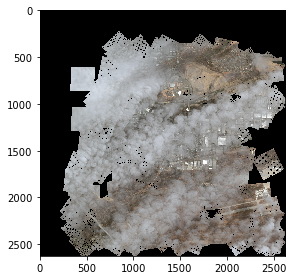

In [28]:
#new_orig = imread('data/original.tiff')

for path in tqdm(train_paths):
    img = imread(path)
#     img = (resize(img, (img.shape[0] //scale, img.shape[1]//scale),
#                        anti_aliasing=True, order=3)*255).astype("uint8")
    #print(img)
    ind = path.split('\\')[-1].split('.')[-2]
    if int(ind) <= 800:
        continue
#     if q > 0:
#         break
    json_path = 'data\\train\\json\\'+str(int(path.split('\\')[-1].split('.')[-2]))+'.json'
    with open(json_path) as f:
        coords = json.load(f)
#     d = 1024//2
#     s = 362
    angle = coords['angle']
    cx = round((coords['left_top'][0] + coords['right_bottom'][0])/2/scale)
    cy = round((coords['left_top'][1] + coords['right_bottom'][1])/2/scale)
#     new_patch = (rotate(img, -angle)*255).astype('int')[d-s:d+s, d-s:d+s, :]
    print(path)
    print(cy, cx)
#     p = np.random.rand()
    for i in range(-512//scale, 512//scale):
        for j in range(-512//scale, 512//scale):
            ji_new = ((np.array([j, i])@rot_mat(angle)).astype('int')+ np.array([cy-1, cx-1]).astype('int'))
            #print(ji_new)
            if ji_new[0] >= 10496//scale or ji_new[1] >= 10496//scale or ji_new[0] < 0 or ji_new[1] < 0:
                continue
            
            new_orig[ji_new[0], ji_new[1], :] = img[512//scale+j, 512//scale+i, :]
            
#     new_orig[cy-s:cy+s, cx-s:cx+s, :] = new_patch
    #imshow(new_orig.astype('uint8'))
    q+=1
    #print(new_orig.mean())
new_orig = new_orig.astype('uint8')

imshow(new_orig)

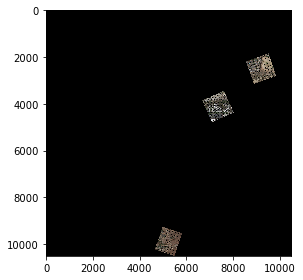

In [194]:
new_orig = new_orig.astype('uint8')
imshow(new_orig)

In [29]:
imsave('data\\new_orig_clouds_03_4.png',new_orig)

new_orig_2 = (resize(new_orig, (new_orig.shape[0] *2, new_orig.shape[1]*2),
                        anti_aliasing=True, order=3)*255).astype("uint8")

imsave('data\\new_orig_clouds_03_2.png',new_orig_2)

new_orig_4 = (resize(new_orig, (new_orig.shape[0] *4, new_orig.shape[1]*4),
                        anti_aliasing=True, order=3)*255).astype("uint8")

imsave('data\\new_orig_clouds_03.png',new_orig_4)